In [46]:
# deps:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# load images from ims/ folder to a numpy array
# using opencv

def load_images(folder_path: str, target_size: tuple[int, int] = (1000, 1000)) -> list[np.ndarray]:
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize the image to a common size
            images.append(img)
    return images

In [55]:
def calculate_histogram_distance(image1, image2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate histograms
    hist1 = cv2.calcHist([gray_image1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([gray_image2], [0], None, [256], [0, 256])

    distance = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
    
    # store the distance in a dictionary
    distdict = {'distance': distance, 'image1': image1, 'image2': image2}

    return distdict

Loaded 9 images


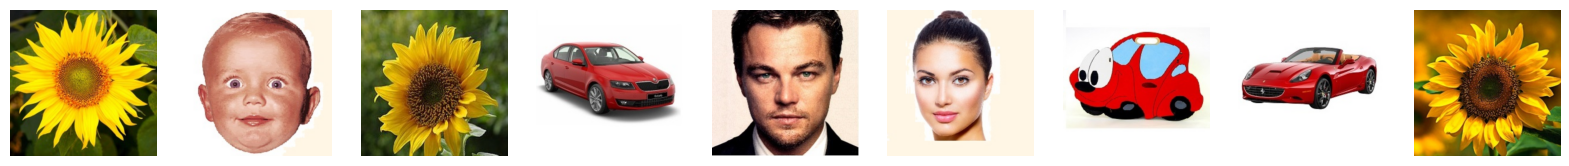

In [56]:
# load images and display them all in 1 plot next to each other
# using plotly
images = load_images('ims', target_size=(1000, 1000))
print(f'Loaded {len(images)} images')

# plot the images
fig, ax = plt.subplots(1, len(images), figsize=(20, 20))
for i, img in enumerate(images):
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].axis('off')
plt.show()


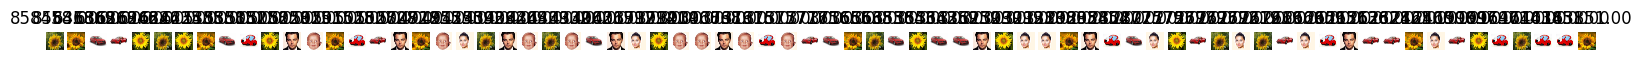

In [67]:
# for each image calculate the distance to the other images
# using the histogram distance
distances = []
for i, img1 in enumerate(images):
    for j, img2 in enumerate(images):
        if i != j:
            distdict = calculate_histogram_distance(img1, img2)
            distances.append(distdict)
            
# sort the distances
distances = sorted(distances, key=lambda x: x['distance'], reverse=True)

# display the distances

fig, ax = plt.subplots(1, len(distances), figsize=(20, 20))
for i, dist in enumerate(distances):
    ax[i].imshow(cv2.cvtColor(dist['image1'], cv2.COLOR_BGR2RGB))
    ax[i].axis('off')
    ax[i].set_title(f'{dist["distance"]:.2f}')
plt.show()


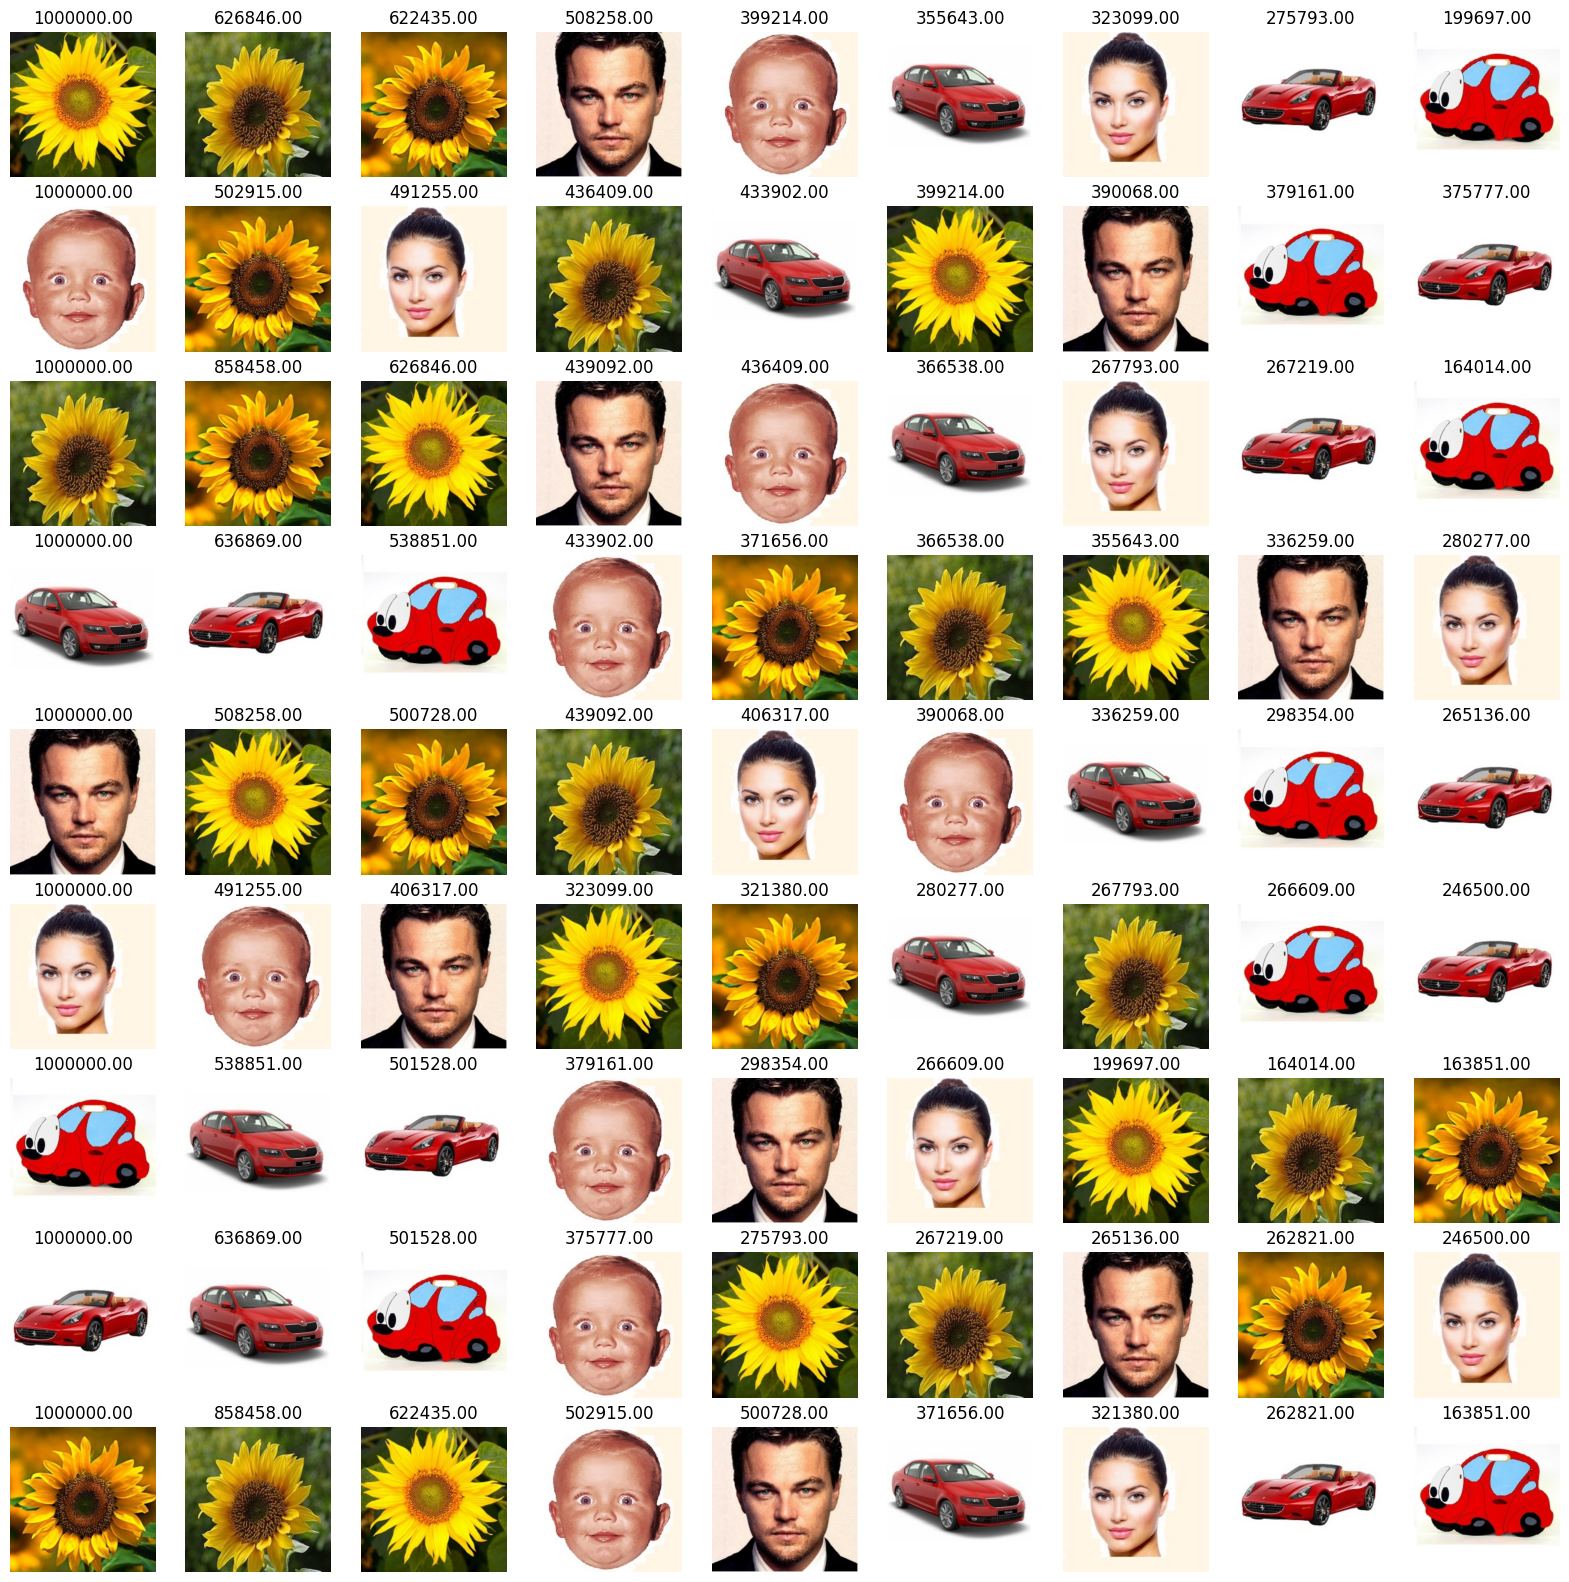

In [72]:
# for each image display the distance to the other images and plot them

# calculate the distances for each image
distances = []
for i, img1 in enumerate(images):
    dists = []
    for j, img2 in enumerate(images):
        distdict = calculate_histogram_distance(img1, img2)
        dists.append(distdict)
    distances.append(dists)
    
# sort the distances for each image
for i, dists in enumerate(distances):
    distances[i] = sorted(dists, key=lambda x: x['distance'], reverse=True)
    
# display the distances
fig, ax = plt.subplots(len(distances), len(distances[0]), figsize=(20, 20))
for i, dists in enumerate(distances):
    for j, dist in enumerate(dists):
        ax[i, j].imshow(cv2.cvtColor(dist['image2'], cv2.COLOR_BGR2RGB))
        ax[i, j].axis('off')
        ax[i, j].set_title(f'{dist["distance"]:.2f}')
        
plt.show()

